<a href="https://colab.research.google.com/github/Zukui/CHE358_python/blob/master/02d_confidenceinterval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confidence interval in regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt 


## data

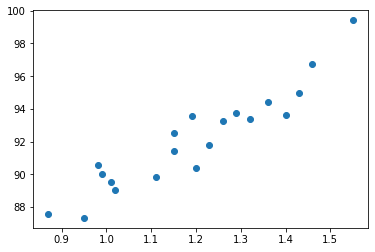

In [0]:
x = np.array([  0.99,	1.02,	1.15,	1.29,	1.46,	1.36,	0.87,	1.23,	1.55,	1.4,     1.19,	1.15,	0.98,	1.01,	1.11,	1.2,     1.26,	1.32,	1.43,	0.95])
y = np.array([ 90.01,	89.05,	91.43,	93.74,	96.73,	94.45,	87.59,	91.77,	99.42,	93.65,	93.54,	92.52,	90.56, 89.54,	89.85,	90.39,	93.25,	93.41,	94.98,	87.33 ])

plt.scatter(x, y) 
plt.show()


## least square estimation

In [0]:
n = len(y)
k = 1
p = 2
Y = y.reshape(n,1)
X = np.hstack((np.ones((n,1)), x.reshape(n,1)))
#print(Y)
#print(X)
X.T@X
C = np.linalg.inv(X.T@X)
hat_theta = C@X.T@Y
print(hat_theta)

[[74.28331424]
 [14.94747973]]


## significance test

In [0]:
hat_Y = X@hat_theta
bar_y = sum(Y)/n
e = Y-hat_Y;

SST = sum((Y-bar_y)**2)
SSR = sum((hat_Y-bar_y)**2)
SSE = e.T@e;

MSE = SSE/(n-p);
MSR = SSR/k;
alpha = 0.05;

from scipy.stats import f as f_dist
from scipy.stats import t as t_dist
t = t_dist.ppf(1-alpha/2,n-p)
f = f_dist.ppf(1-alpha/2,k, n-p)

CI_theta_low = hat_theta-t*np.sqrt(MSE*np.diag(C))  # confidence intervals on parameters
CI_theta_high = hat_theta+t*np.sqrt(MSE*np.diag(C))
print(CI_theta_low)
print(CI_theta_high)

F0 = MSR/MSE    # ANOVA
R2 = SSR/SST   # R square
R_adj2 = 1-SSE/(n-p)/(SST/(n-1))  # R adjusted square

print(F0)
print(f)
print(R2)


[[70.9355509  71.51690777]
 [11.5997164  12.18107326]]
[[77.63107758 77.04972071]
 [18.29524307 17.7138862 ]]
[[128.86169431]]
5.978052464789608
[0.87743571]


## confidence interval of mean response and prediction

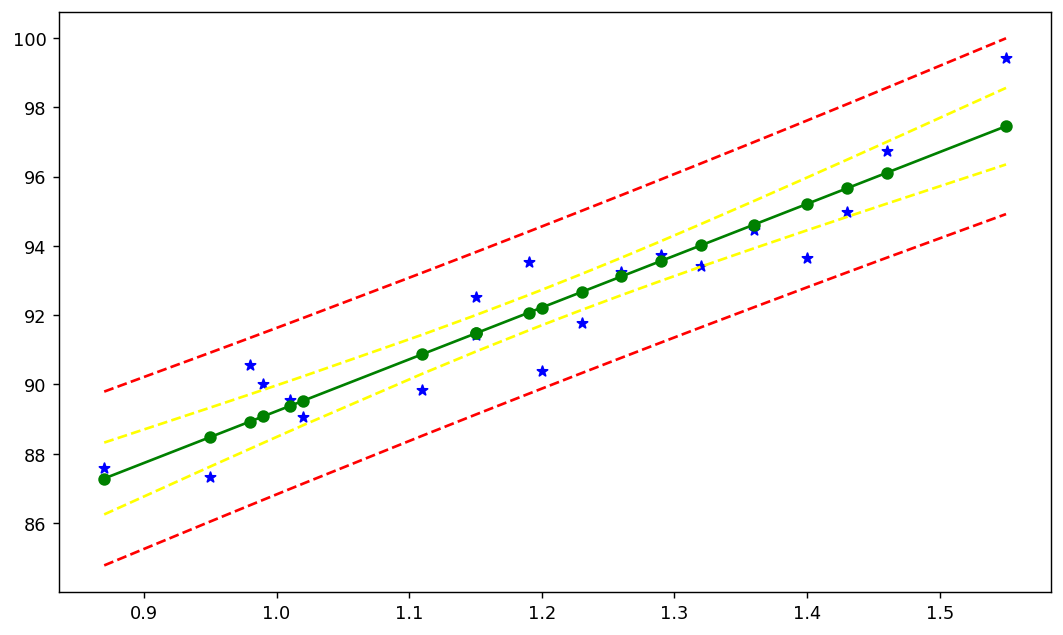

In [0]:
# confidence interval on the mean response and predictions at all given x points
hat_mu_Y = X@hat_theta
CI_mu_Y_low = np.zeros((n,1))
CI_mu_Y_high = np.zeros((n,1))
CI_Y0_low = np.zeros((n,1))
CI_Y0_high = np.zeros((n,1))
for i in range(n):
    CI_mu_Y_low[i] =  hat_mu_Y[i] - t*np.sqrt(MSE*X[i,:]@C@X[i,:].T);
    CI_mu_Y_high[i] = hat_mu_Y[i] + t*np.sqrt(MSE*X[i,:]@C@X[i,:].T);
    CI_Y0_low[i] =  hat_mu_Y[i] - t*np.sqrt(MSE*(1+X[i,:]@C@X[i,:].T));
    CI_Y0_high[i] = hat_mu_Y[i] + t*np.sqrt(MSE*(1+X[i,:]@C@X[i,:].T));

#print(Y)
alldata = np.concatenate((x.reshape(n,1), Y, hat_Y, CI_mu_Y_low, CI_mu_Y_high, CI_Y0_low, CI_Y0_high),axis=1)
sortdata = alldata[np.argsort(alldata[:, 0])]

#print(sortdata)
plt.figure(dpi=128, figsize=(10, 6))
plt.scatter(sortdata[:,0], sortdata[:,1], c='blue',  marker="*") 
plt.plot(sortdata[:,0], sortdata[:,2], c='green',  marker='o', linestyle='solid') 
plt.plot(sortdata[:,0], sortdata[:,3], c='yellow',  linestyle='dashed') 
plt.plot(sortdata[:,0], sortdata[:,4], c='yellow',  linestyle='dashed') 
plt.plot(sortdata[:,0], sortdata[:,5], c='red',  linestyle='dashed') 
plt.plot(sortdata[:,0], sortdata[:,6], c='red',  linestyle='dashed') 


#plt.axis([0, 11, 0, 1100]) 
plt.show()